# <b><u> Project Title : Online Retail Customer Segmentation </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

```
Project Agenda:

* Data Description

* Defining the problem statement

* Data Preprocessing & Feature Engineering

* EDA

* RFM Analysis.

* Hypothesis on the number of clusters

* Model 1: K-means Clustering using the K-Elbow

* Model 2: K-means Clustering using the Silhouette scores

* Conclusion
```


## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. A 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. A 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name.
* ### Quantity: The quantities of each product (item) per transaction.
* ### InvoiceDate: Invoice Date and time. The day and time when each transaction was generated.
* ### UnitPrice: Unit price. Product price per unit in sterling.
* ### CustomerID: Customer number. A 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. The name of the country where each customer resides.

In [ ]:
# Importing the pre-requisite libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns; sns.set_theme()
import datetime as dt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

!pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer

import warnings
warnings.filterwarnings('ignore')   # Code to ensure that python dosesn't give any warnings.

#pd.set_option('max_columns', None) # Code to ensure that all the columns in the dataframe are shown.

plt.rcParams["figure.figsize"] = (20, 10) # Changing the deafult size of the visualization.

In [3]:
# Mounting the Drive.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Importing the dataset.

retail_df = pd.read_excel('/content/drive/MyDrive/Online Retail.xlsx')

In [6]:
# Inspecting the dataset.

retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
retail_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [8]:
# Understanding the basic stats.

retail_df.describe(include = 'all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,23260,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,1114,NaN,NaN,495478
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN


In [9]:
# Checking out the datatype of all the columns.

retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## **Defining The Problem Statement**

*Understanding the difference between numeric[continuous variables and discrete variables] & categorical variables.*

**Continous variables** - These are those variables whose values are obtained by measuring. They can assume any value between an interval.

**Discrete variables** - These are those variables whose values are obtained by counting. They can assume distinct set of values.

**Categorical variables** - These are those variables whose values are of string datatype or binary in nature and they assume distinct set of values.


*Segregating the variables into categorical, continuous/discrite, datetime and, textual in nature.*

Variables:

* InvoiceNo = It is categorical and Nominal in nature.

* StockCode = It is categorical and Nominal in nature.

* Description = It is textual in nature.

* Quantity = It is continuous in nature.

* InvoiceDate = It is of Datetime in nature.

* UnitPrice = It is continuous in nature.

* CustomerID = It is categorical and Nominal in nature.

* Country = It is categorical and Nominal in nature.

## **Data Preprocessing**

In this section, I will be treating the null values, dublicated rows and also dropping those orders that have been cancelled by the customers.

**Note:** Outliers in the data are not removed because we need that data to rank the customers using RFM.

In [10]:
# Checking for duplicate rows.

duplicate_check = retail_df[retail_df.duplicated()]
print(f'The number of duplicate rows in the dataset are {len(duplicate_check)}')

The number of duplicate rows in the dataset are 5268


In [11]:
# Removing all these rows.

retail_df = retail_df[~retail_df.duplicated()]
print('The shape of the dataset after removing duplicates are {0}'.format(retail_df.shape))

The shape of the dataset after removing duplicates are (536641, 8)


In [12]:
# Checking for null values and removing them.

print('The number of null values in each column are as the following: \n')
retail_df.isnull().sum()

The number of null values in each column are as the following: 



InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

Columns Description and CustomerID have null values. The only way to deal with this is to remove those rows that have null values. Because you can't compute CustomerID(unique idenfication number) & Description.

In [13]:
# Dropping all the rows that have null values.

retail_df.dropna(inplace = True)
print('The shape of dataset after dropping null values is {0}'.format(retail_df.shape))

The shape of dataset after dropping null values is (401604, 8)


Even after removing dublicate and null values, we still have a ton of data to play around with.

In [14]:
# Dropping those orders that have been cancelled by the customers.

cancel_df = retail_df[retail_df['InvoiceNo'].str.contains('C',na = False)]
print('The number of cancelled orders by the customers are {0}'.format(len(cancel_df)))

retail_df = retail_df[~retail_df['InvoiceNo'].str.contains('C',na = False)]

The number of cancelled orders by the customers are 8872


Removing cancelled orders because it makes zero sense to consider these observations for RFM analysis.

## **Feature Engineering**

Feature engineering refers to the process of creating new features from exisitng features in the dataset.

In [15]:
# Feature Engineering the Total_Price column.

retail_df['Total_Price'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


The Total_Price can be used to calulate the monetary value of each customer.

In [16]:
# Feature engineering the Last_Purchase column.

assumed_date = dt.datetime(2011,12,10)
retail_df['Last_Purchase'] = (assumed_date - retail_df['InvoiceDate']).dt.days
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price,Last_Purchase
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373


The Last_Purchase column can be used to calculate the recency value of each customer.

In [17]:
# Feature engineering the InvoiceDate column

retail_df['year'] = retail_df['InvoiceDate'].dt.year
retail_df['month'] = retail_df['InvoiceDate'].dt.month
retail_df['day'] = retail_df['InvoiceDate'].dt.day_name()
retail_df['hour'] = retail_df['InvoiceDate'].dt.hour

retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price,Last_Purchase,year,month,day,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373,2010,12,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373,2010,12,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373,2010,12,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373,2010,12,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373,2010,12,Wednesday,8


I have extracted various information from the invoice column for EDA.

## **EDA**

Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques. It is used to discover trends, patterns using Visualization.

In [18]:
# Understaing the distribution of various columns in the dataset.

columns = list(retail_df.describe(include = ['int64','float64']).columns)
columns.pop(2) # Removing customerID from the list.

'CustomerID'

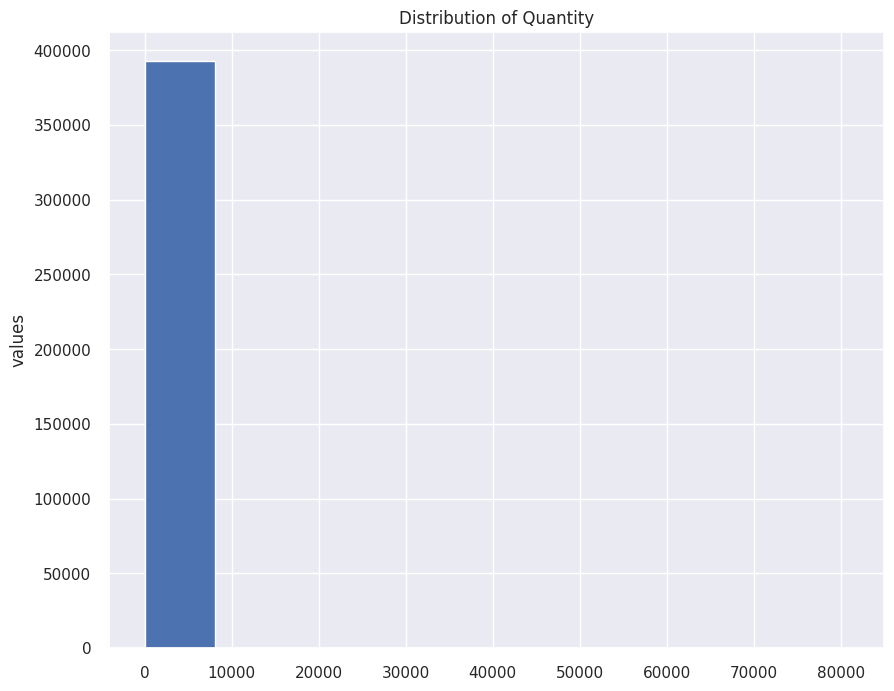

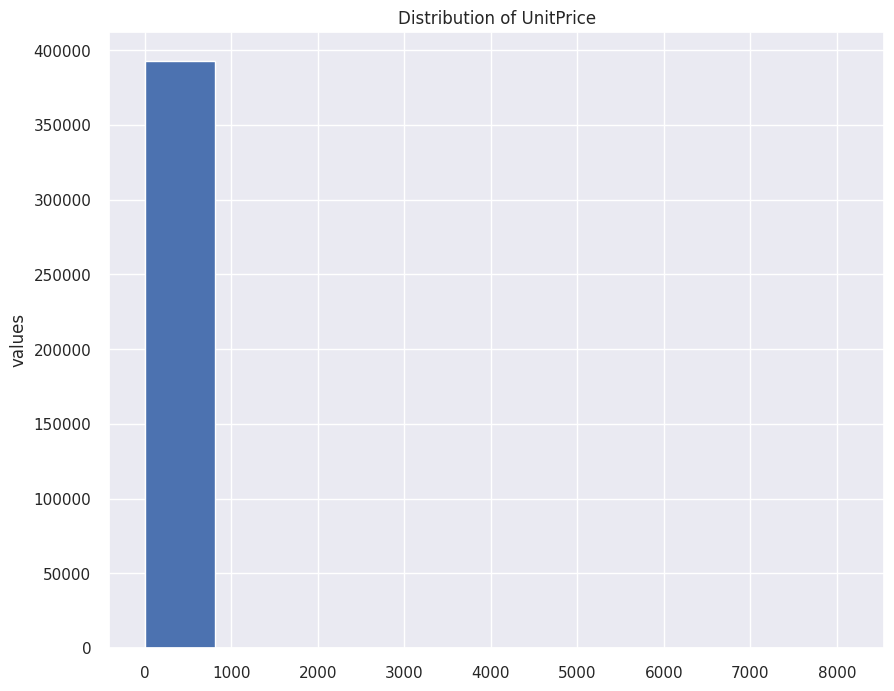

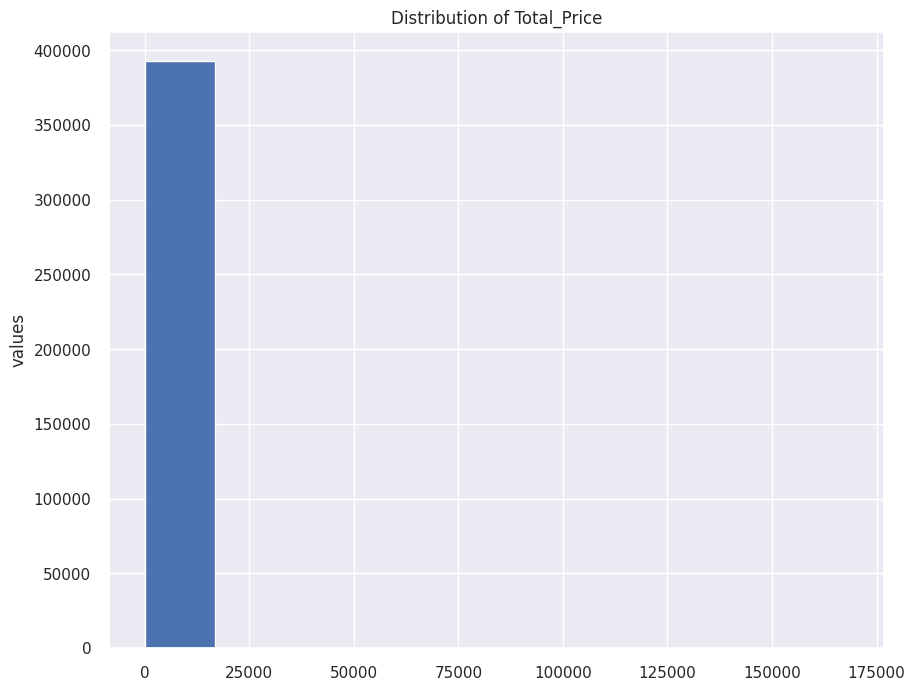

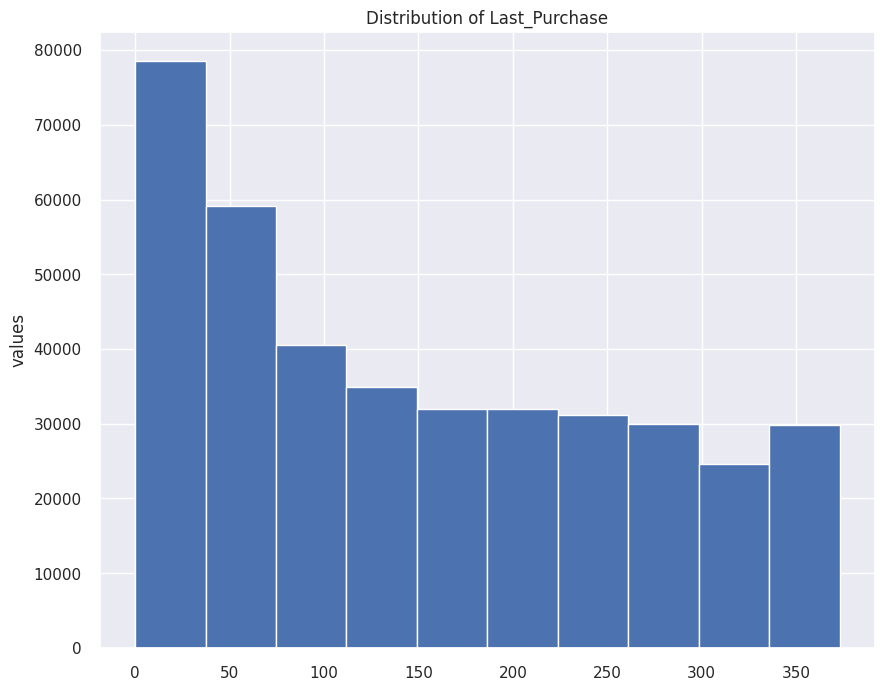

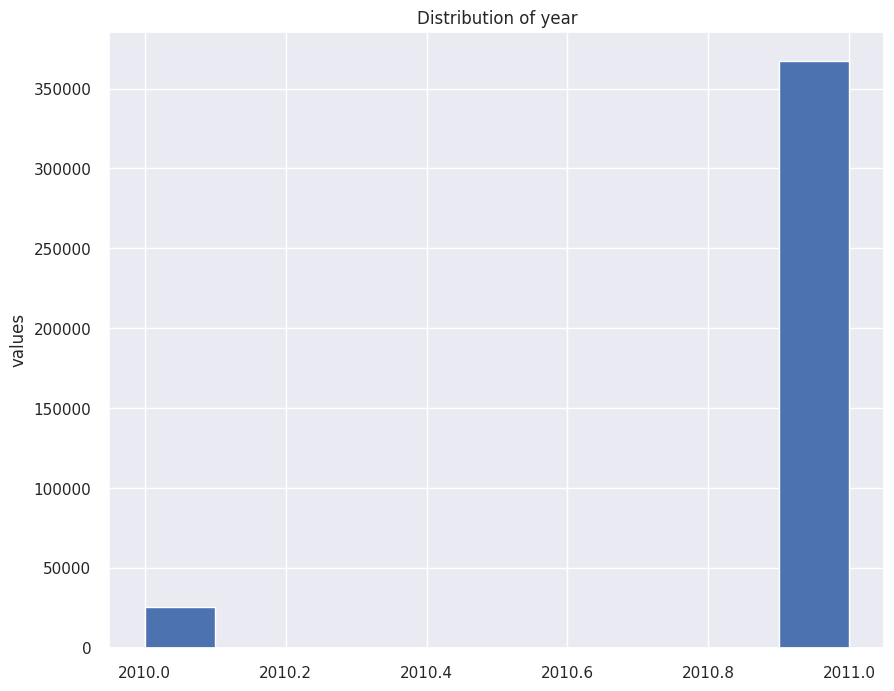

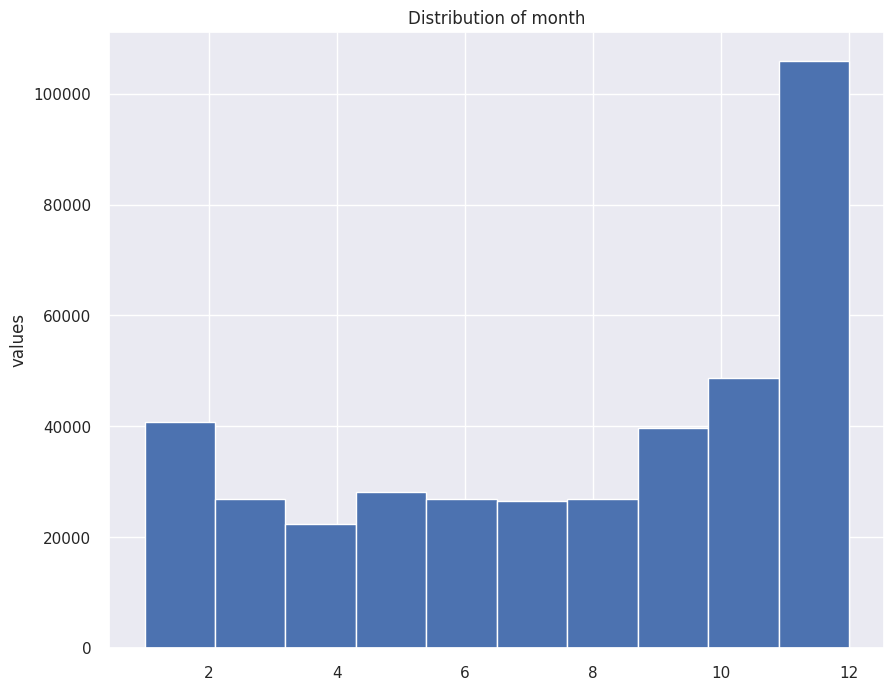

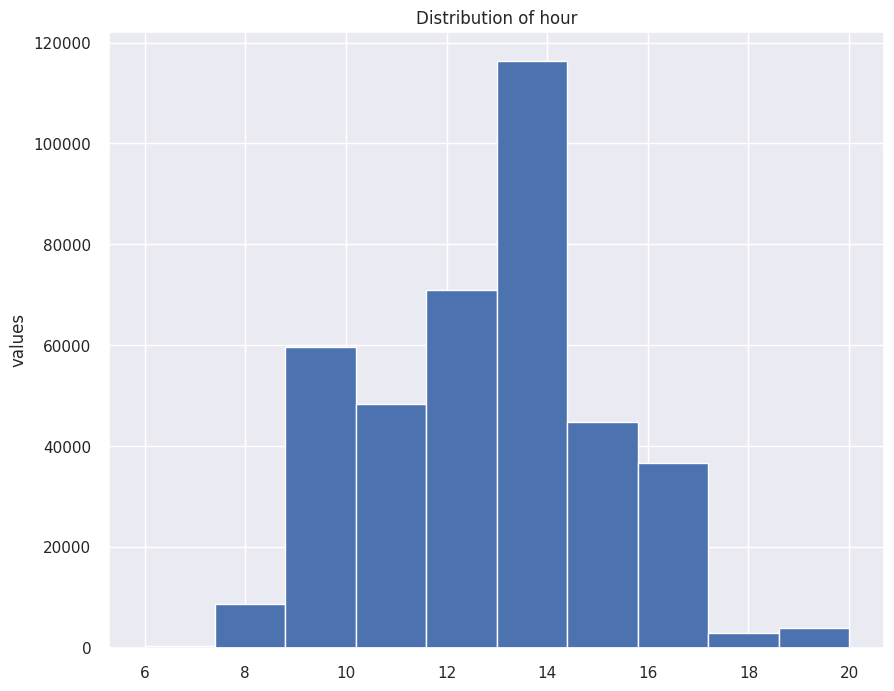

In [19]:
# Writting a for loop for outputting the distribution of the columns

for col in columns:
  plt.figure(figsize = (10,8))
  plt.hist(retail_df[col])
  plt.gca()
  plt.title('Distribution of {}'.format(col))
  plt.ylabel('values')

**Hypothesis:** Since the company is based out of UK, most of the customers must be from UK itself.

Text(0, 0.5, 'Counts')

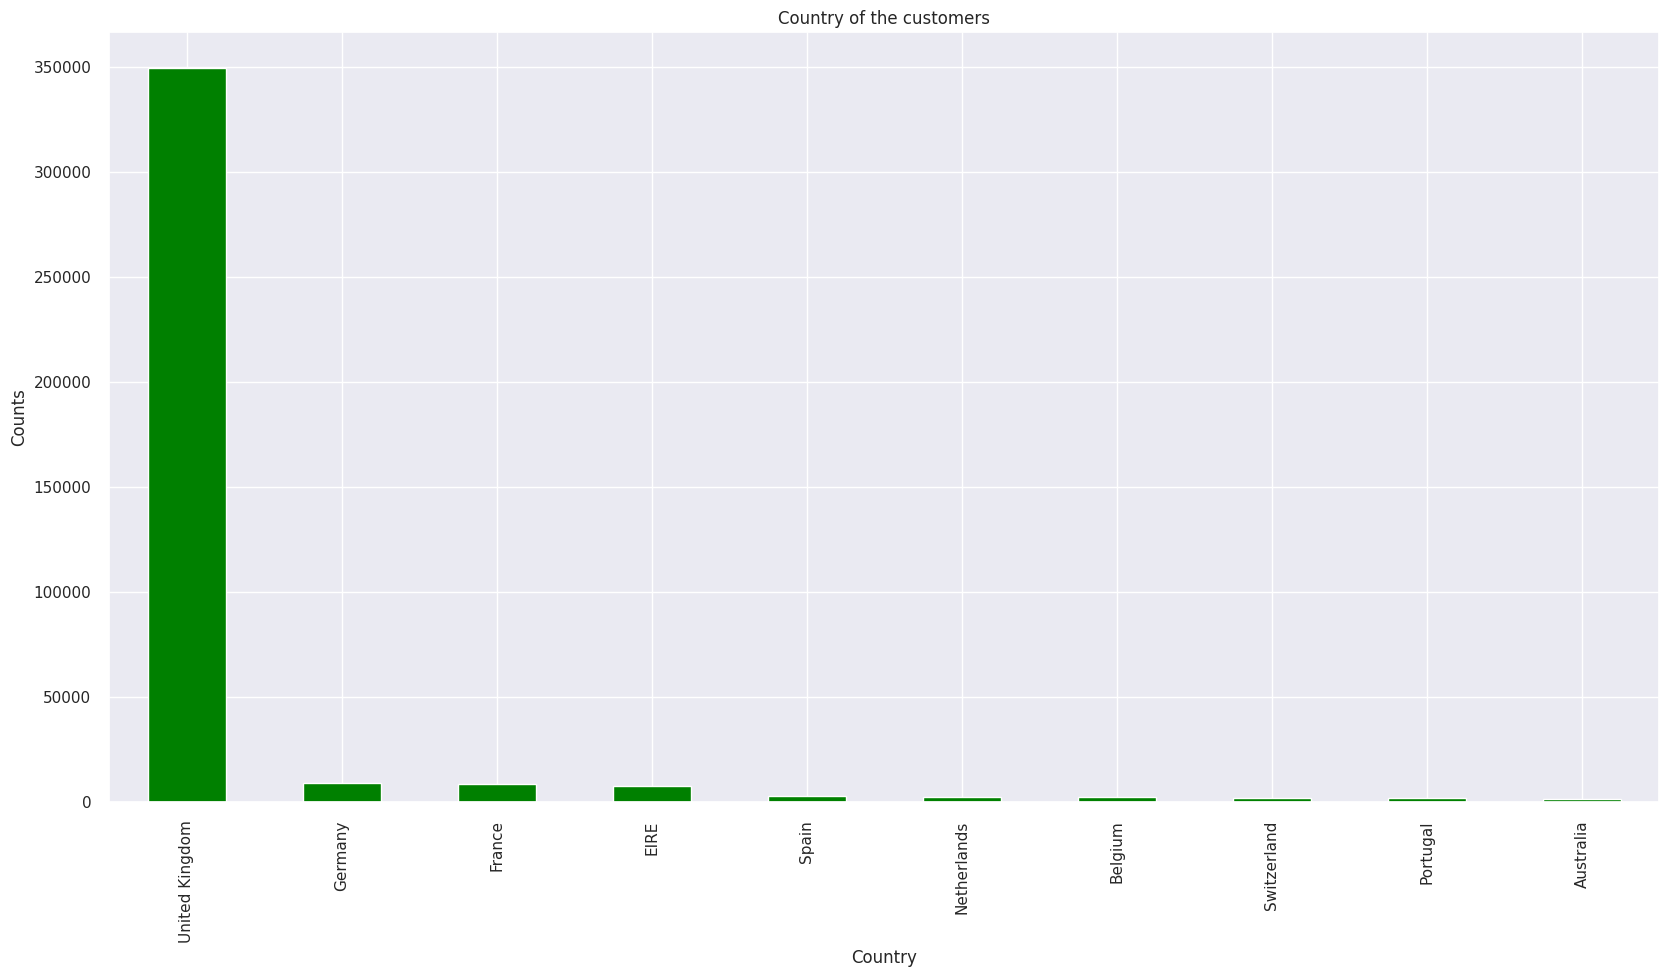

In [20]:
# Plotting the countries of the customers.

frequent_country_of_customers = retail_df['Country'].value_counts().head(10)
frequent_country_of_customers.plot(kind = 'bar',color = 'green')
plt.title('Country of the customers')
plt.xlabel('Country')
plt.ylabel('Counts')

**Analysis:** My hypothesis is indeed True.
___________________________________________________________________

Text(0.5, 1.0, 'Most Spend Customers')

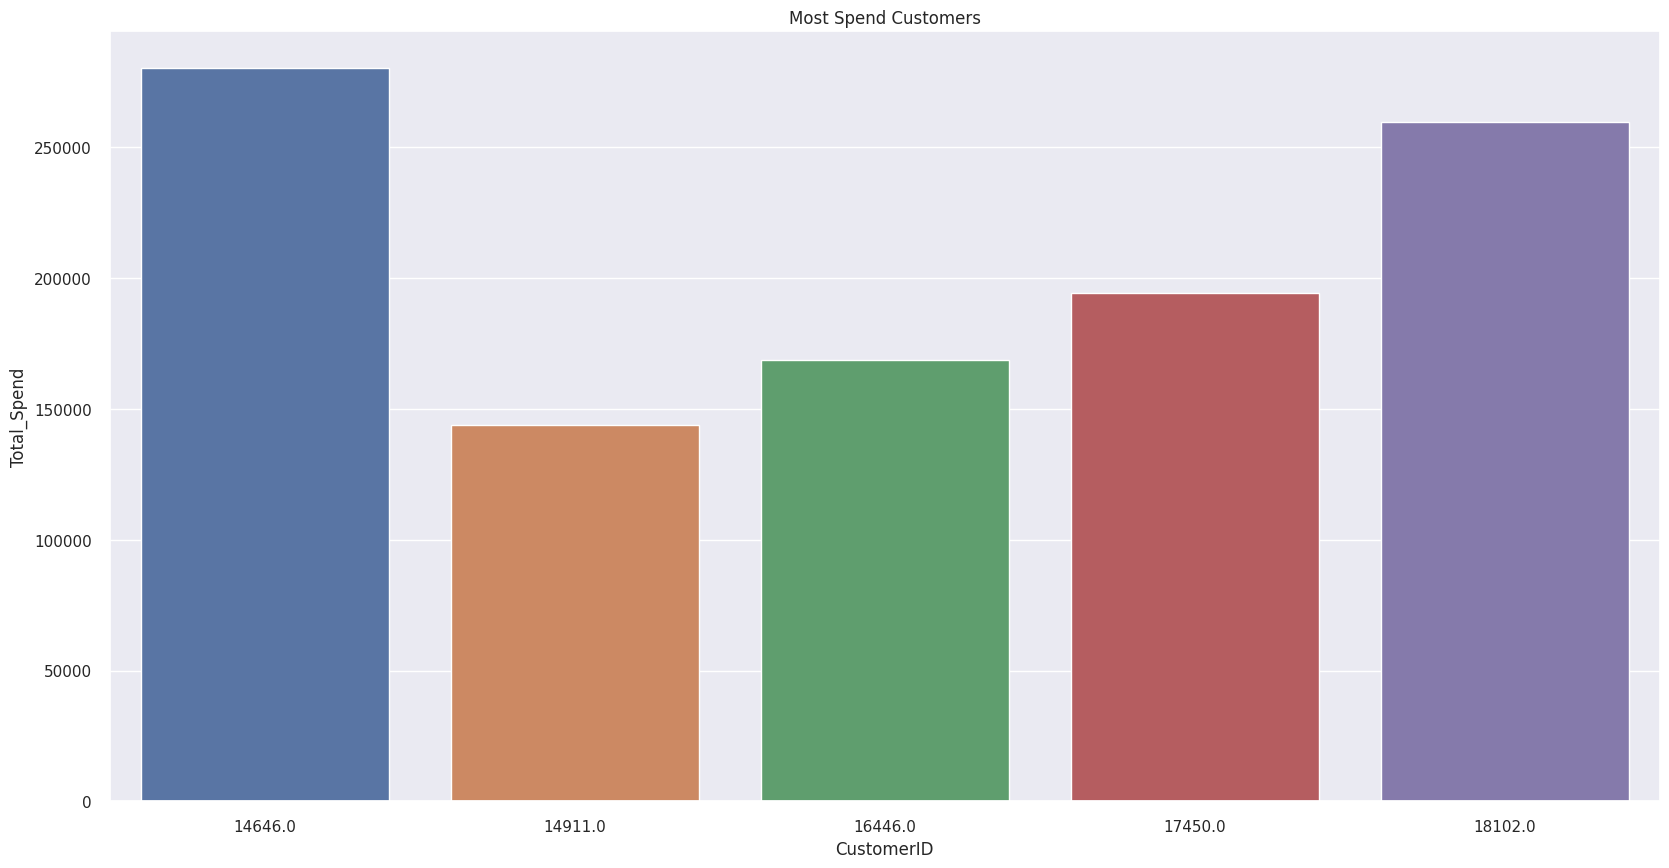

In [21]:
# Checking out the customer who spent the most money.

most_spend_customer = retail_df.groupby('CustomerID')['Total_Price'].sum().reset_index()\
                    .sort_values('Total_Price',ascending = False).head(5).rename(columns = {'Total_Price':'Total_Spend'})

sns.barplot(x = most_spend_customer['CustomerID'], y = most_spend_customer['Total_Spend'],data = most_spend_customer)

plt.title('Most Spend Customers')

**Hypothesis:** Sales will be more towards the end of the year because of festivals like Christmas.

([<matplotlib.axis.XTick at 0x7f2c21ddc7f0>,
 [Text(1, 0, 'Jan'),
  Text(2, 0, 'Feb'),
  Text(3, 0, 'Mar'),
  Text(4, 0, 'Apr'),
  Text(5, 0, 'May'),
  Text(6, 0, 'Jun'),
  Text(7, 0, 'Jul'),
  Text(8, 0, 'Aug'),
  Text(9, 0, 'Sep'),
  Text(10, 0, 'Oct'),
  Text(11, 0, 'Nov'),
  Text(12, 0, 'Dec')])

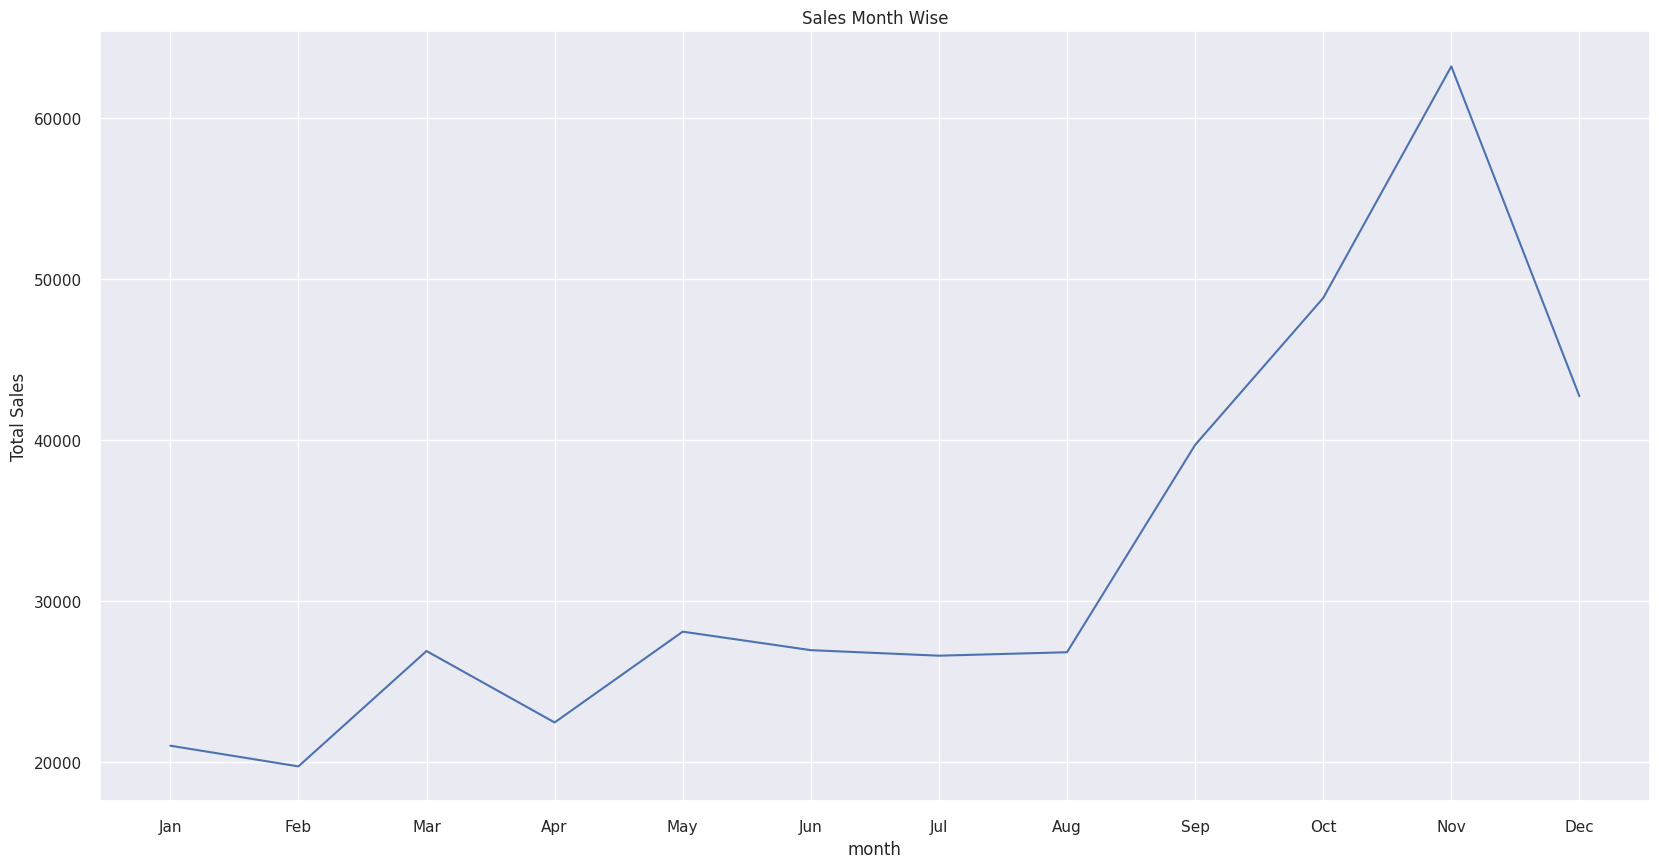

In [22]:
# Plotting the top months interms of sales.

top_months = retail_df.groupby('month')['InvoiceNo'].count().reset_index().sort_values('InvoiceNo',ascending = False)\
            .rename(columns = {'InvoiceNo':'Total Sales'})

sns.lineplot(x = top_months['month'], y = top_months['Total Sales'], data = top_months)

plt.title('Sales Month Wise')
x = [1,2,3,4,5,6,7,8,9,10,11,12]
label = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(x,label) # Changing the X axis labels to month names

**Analysis:** My hypothesis is True!
_____________________________________________________________________

**Hypothesis:** Customers place most of the orders during working hours.

Text(0.5, 1.0, 'Hour wise sales')

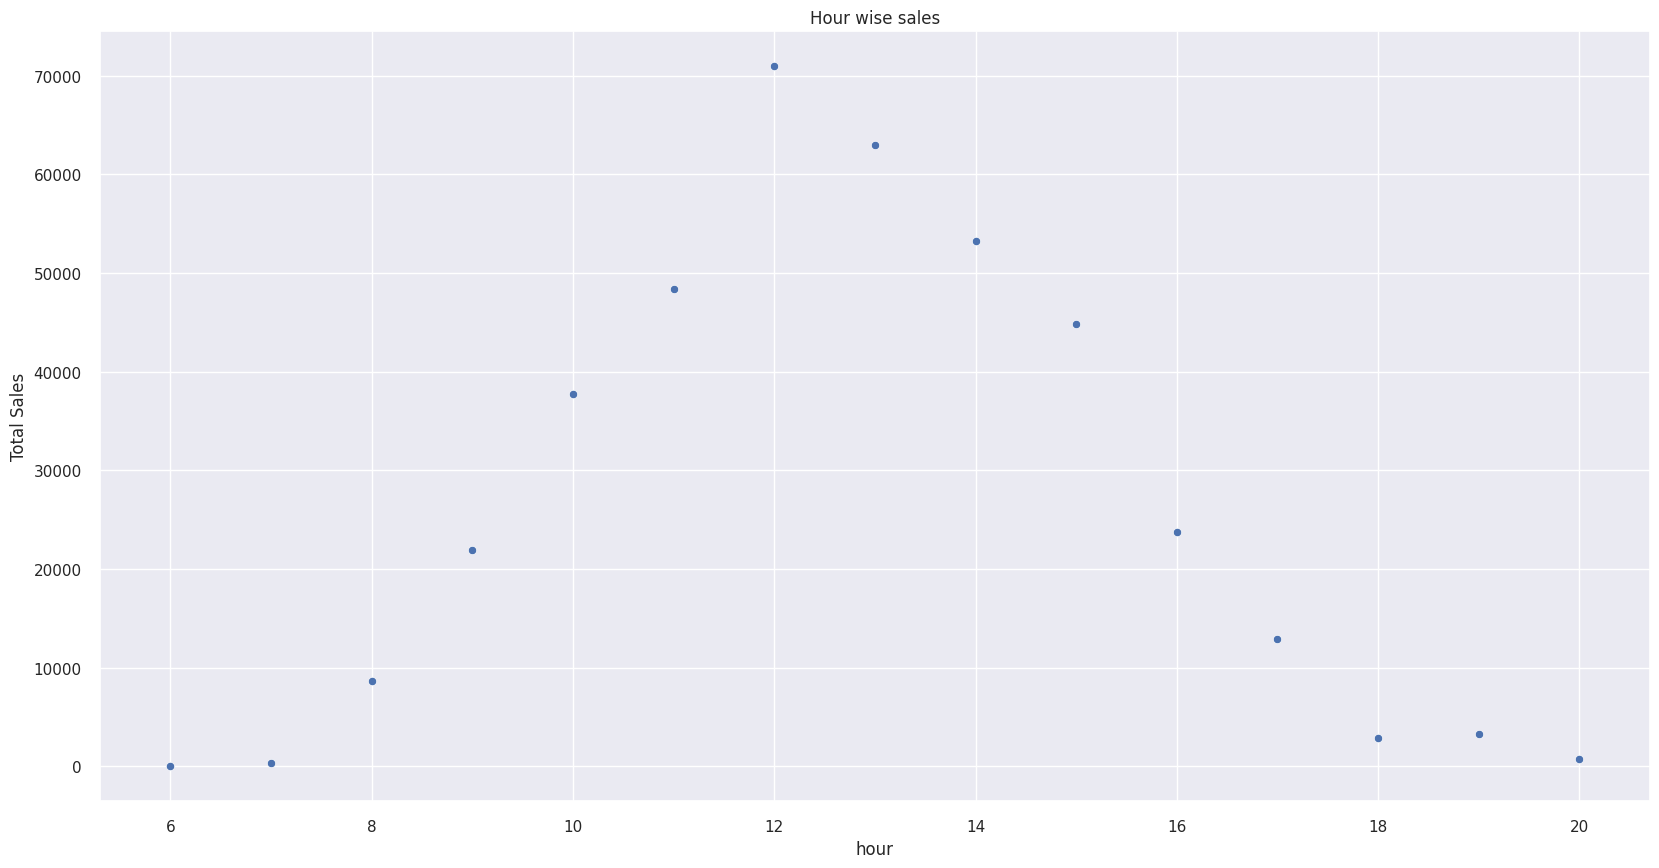

In [23]:
# Plotting hour wise sales.

hour_sales = retail_df.groupby('hour')['InvoiceNo'].count().reset_index().rename(columns = {'InvoiceNo':'Total Sales'})

sns.scatterplot(x = hour_sales['hour'], y = hour_sales['Total Sales'], data = hour_sales)
plt.title('Hour wise sales')

**Analysis:** Yayy!! My hypothesis is True!
__________________________________________________________________

In [24]:
# Calculating the revenue generated by customers for the year 2010

year_2010_df = retail_df[retail_df['year'] == 2010]
year_2011_df = retail_df[retail_df['year'] == 2011]

total_revenue_company_wise_2010 = year_2010_df.groupby('CustomerID')['Total_Price'].sum().reset_index().sort_values('Total_Price', ascending = False)
total_revenue_company_wise_2010.rename(columns = {'Total_Price':'Total_Spending_2010'},inplace = True)
total_revenue_company_wise_2010

,CustomerID,Total_Spending_2010
865,18102.0,27834.61
370,15061.0,19950.66
522,16029.0,13112.52
309,14646.0,8591.88
349,14911.0,7737.94
...,...,...
878,18225.0,30.00
818,17888.0,29.43
800,17816.0,16.21
485,15823.0,15.00


In [25]:
# Calculating the revenue generated by customers for the year 2011

total_revenue_company_wise_2011 = year_2011_df.groupby('CustomerID')['Total_Price'].sum().reset_index().sort_values('Total_Price', ascending = False)
total_revenue_company_wise_2011.rename(columns = {'Total_Price':'Total_Spending_2011'},inplace = True)
total_revenue_company_wise_2011

,CustomerID,Total_Spending_2011
1654,14646.0,271614.14
4087,18102.0,231822.69
3637,17450.0,192361.95
2937,16446.0,168472.50
1841,14911.0,135973.23
...,...,...
3459,17194.0,10.00
2943,16454.0,6.90
1757,14792.0,6.20
3137,16738.0,3.75


In [26]:
# Calulating the percentage increase in sales from 2010 to 2011 for various customers.

spending_df = pd.merge(total_revenue_company_wise_2011,total_revenue_company_wise_2010, how = 'outer', on = 'CustomerID')

spending_df['percentage_spending'] = ((spending_df['Total_Spending_2011'] - spending_df['Total_Spending_2010']) / spending_df['Total_Spending_2011']) * 100

top_spending_increase = spending_df.sort_values('percentage_spending', ascending = False)[:5]

Text(0.5, 1.0, 'Customers with the maxinum increase of Sales')

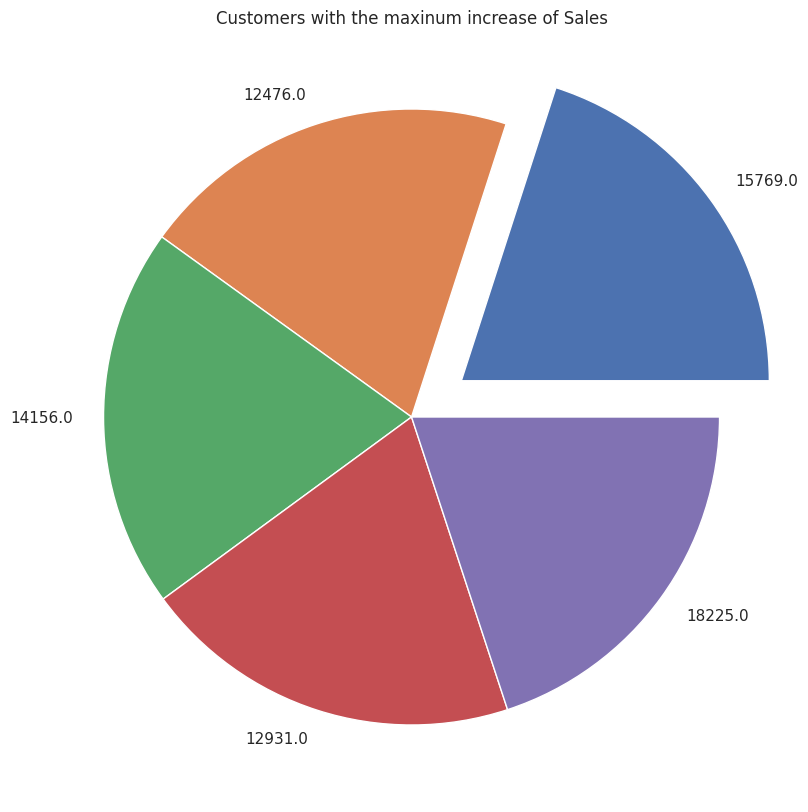

In [27]:
# Plotting a pie chart showing the top 5 customers who have the highest percentage increase.

myexplode = [0.2,0,0,0,0]
mylabels = list(top_spending_increase['CustomerID'])
y = np.array(top_spending_increase['percentage_spending'])
plt.pie(y,labels = mylabels,explode = myexplode)
plt.title('Customers with the maxinum increase of Sales')

## **RFM model (Recency, Frequency,Monetary value)**

Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors:
* Recency: When was the last purchase made.
* Frequency: How often a customer makes a purchase.
* Monetary Value: How much money a customer spent between a time interval.

RFM process.
* The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer.
* The second step is to identify a threshold for Recency, Frequency,and Monetary values for encoding(A common way of deciding the threshold is through percentile values).
* The third step is to add the encoded Recency, Frequency, Monetary values to obtain RFM scores.

In [28]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price,Last_Purchase,year,month,day,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373,2010,12,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373,2010,12,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373,2010,12,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373,2010,12,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373,2010,12,Wednesday,8


In [29]:
# Creating a Recency df.

Recency_df = retail_df.groupby('CustomerID')['Last_Purchase'].min().reset_index().rename(columns = {'Last_Purchase':'Recency'})
Recency_df.head()

,CustomerID,Recency
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


In [30]:
# Creating a Frequency df.

Frequency_df = retail_df.groupby('CustomerID')['InvoiceNo'].count().reset_index().rename(columns = {'InvoiceNo':'Frequency'})
Frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [31]:
# Creating a Monetary df.

Monetary_df = retail_df.groupby('CustomerID')['Total_Price'].sum().reset_index().rename(columns = {'Total_Price':'Monetary'})
Monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [32]:
# Creating RFM_df.

RF_df = pd.merge(Recency_df,Frequency_df,how = 'inner',on = 'CustomerID')
RFM_df = pd.merge(RF_df,Monetary_df,how = 'inner',on = 'CustomerID')
RFM_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [33]:
# Creating a function to that returns the percentile values of columns

def percentile(col,percentiles):

  '''This function takes datarame, list of percentiles as input and returns
  the values of the inputted percentiles.'''

  percentile_dict = {}
  for i in percentiles:
    percentile_dict[i] = np.percentile(col,i)
  return percentile_dict

In [34]:
# Calculating the percentile values of Recency,Frequency,Monetary columns.

Recency_percentile = percentile(RFM_df['Recency'],[25,50,75])
Frequency_percentile = percentile(RFM_df['Frequency'],[25,50,75])
Monetary_percentile = percentile(RFM_df['Monetary'],[25,50,75])

In [35]:
# Encoding the values of the columns.

def Receny_encoding(row):
  if row < Recency_percentile[25]:
    return 4
  elif (row >= Recency_percentile[25]) & (row < Recency_percentile[50]):
    return 3
  elif (row >= Recency_percentile[50]) & (row < Recency_percentile[75]):
    return 2
  else:
    return 1

def Freqency_encoding(row):
  if row < Frequency_percentile[25]:
    return 1
  elif (row >= Frequency_percentile[25]) & (row < Frequency_percentile[50]):
    return 2
  elif (row >= Frequency_percentile[50]) & (row < Frequency_percentile[75]):
    return 3
  else:
    return 4

def Monetary_encoding(row):
  if row < Monetary_percentile[25]:
    return 1
  elif (row >= Monetary_percentile[25]) & (row < Monetary_percentile[50]):
    return 2
  elif (row >= Monetary_percentile[50]) & (row < Monetary_percentile[75]):
    return 3
  else:
    return 4

I have encoded the columns in such a way that, the higher the RFM socres the better the customer and vice-versa.

For low values of Recency, I have encoded them with high values and for high values of Recency, I have encoded them with low values.

For High values of Frequency, I have encoded them with high values and for low values of Frequency, I have encoded them with low values

For High values of Monetary, I have encoded them with high values and for low values of Monetary, I have encoded them with low values

In [36]:
# Applying the above encoding functions to the dataframe.

RFM_df['R'] = RFM_df['Recency'].apply(Receny_encoding)
RFM_df['F'] = RFM_df['Frequency'].apply(Freqency_encoding)
RFM_df['M'] = RFM_df['Monetary'].apply(Monetary_encoding)

RFM_df

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,325,1,77183.60,1,1,4
1,12347.0,2,182,4310.00,4,4,4
2,12348.0,75,31,1797.24,2,2,4
3,12349.0,18,73,1757.55,3,3,4
4,12350.0,310,17,334.40,1,2,2
...,...,...,...,...,...,...,...
4334,18280.0,277,10,180.60,1,1,1
4335,18281.0,180,7,80.82,1,1,1
4336,18282.0,7,12,178.05,4,1,1
4337,18283.0,3,721,2045.53,4,4,4


In [37]:
# Calculating the RFM scores by adding the R,F,M columns.

RFM_df['RFM_score'] = RFM_df['R'] + RFM_df['F'] + RFM_df['M']
RFM_df.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_score
0,12346.0,325,1,77183.60,1,1,4,6
1,12347.0,2,182,4310.00,4,4,4,12
2,12348.0,75,31,1797.24,2,2,4,8
3,12349.0,18,73,1757.55,3,3,4,10
4,12350.0,310,17,334.40,1,2,2,5


In [38]:
# Checking out the best and the worst customers.

RFM_score_percentiles = percentile(RFM_df['RFM_score'],[50,75])

In [39]:
# Segmenting the customers using RFM scores.

Irrelevant_customers = RFM_df[RFM_df['RFM_score'] < RFM_score_percentiles[50]]
print(f'There are {len(Irrelevant_customers)} Irrelevant customers')

Modest_customers = RFM_df[(RFM_df['RFM_score'] >= RFM_score_percentiles[50]) & (RFM_df['RFM_score'] < RFM_score_percentiles[75])]
print(f'There are {len(Modest_customers)} Modest customers')

Important_customers = RFM_df[RFM_df['RFM_score'] >= RFM_score_percentiles[75]]
print(f'There are {len(Important_customers)} Important customers')

There are 1755 Irrelevant customers
There are 1335 Modest customers
There are 1249 Important customers


I have segmented all those customers whose RFM_score < 7(50th percentile) as Irrelevant customers.

All those customers whose 7 <= RFM_score > 10(75th percentile) as Modest customers

And all those customers whose RFM_score >= 10 as Important customers

## **Making Hypothesis(Visually idenfiying clusters) from plots**

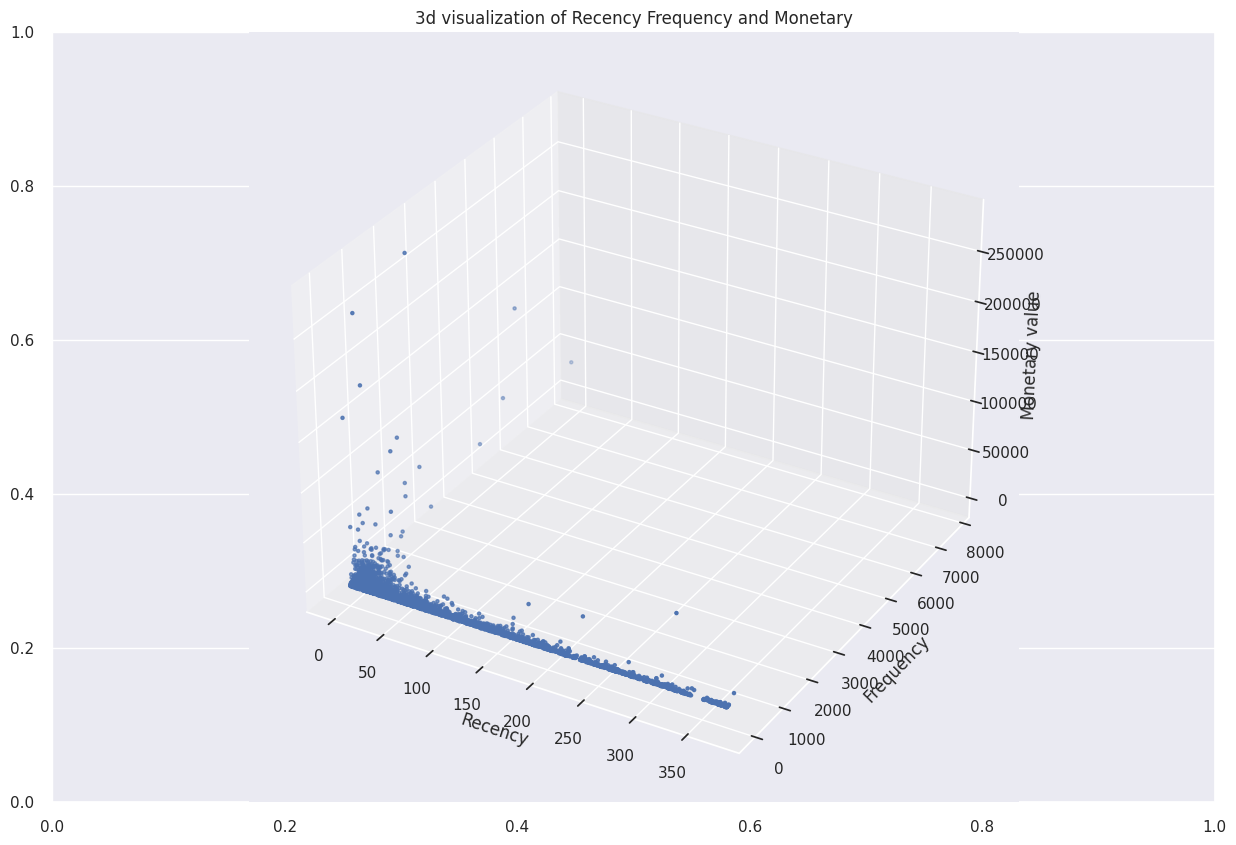

In [40]:
#Plotting a 3-D graph to identify clusters.

fig=plt.figure(figsize=(15,10))
plt.title('3d visualization of Recency Frequency and Monetary')
ax=fig.add_subplot(111,projection='3d')
xs=RFM_df.Recency
ys=RFM_df.Frequency
zs=RFM_df.Monetary
ax.scatter(xs,ys,zs,s=5)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary value')
plt.show()

As you can see it is difficult to visually identify the number of clusters from a 3-D data. So I will reduce the dimentionality of the data to make some hypothesis(Identifying clusters).

In [41]:
# Scaling the data.

X = RFM_df[['Recency','Frequency','Monetary']]
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

In [42]:
# Implementing PCA.

pca = PCA(n_components=2)
pca.fit(X_scale)
_2d_df = pca.transform(X_scale)

Text(0, 0.5, 'PCA2')

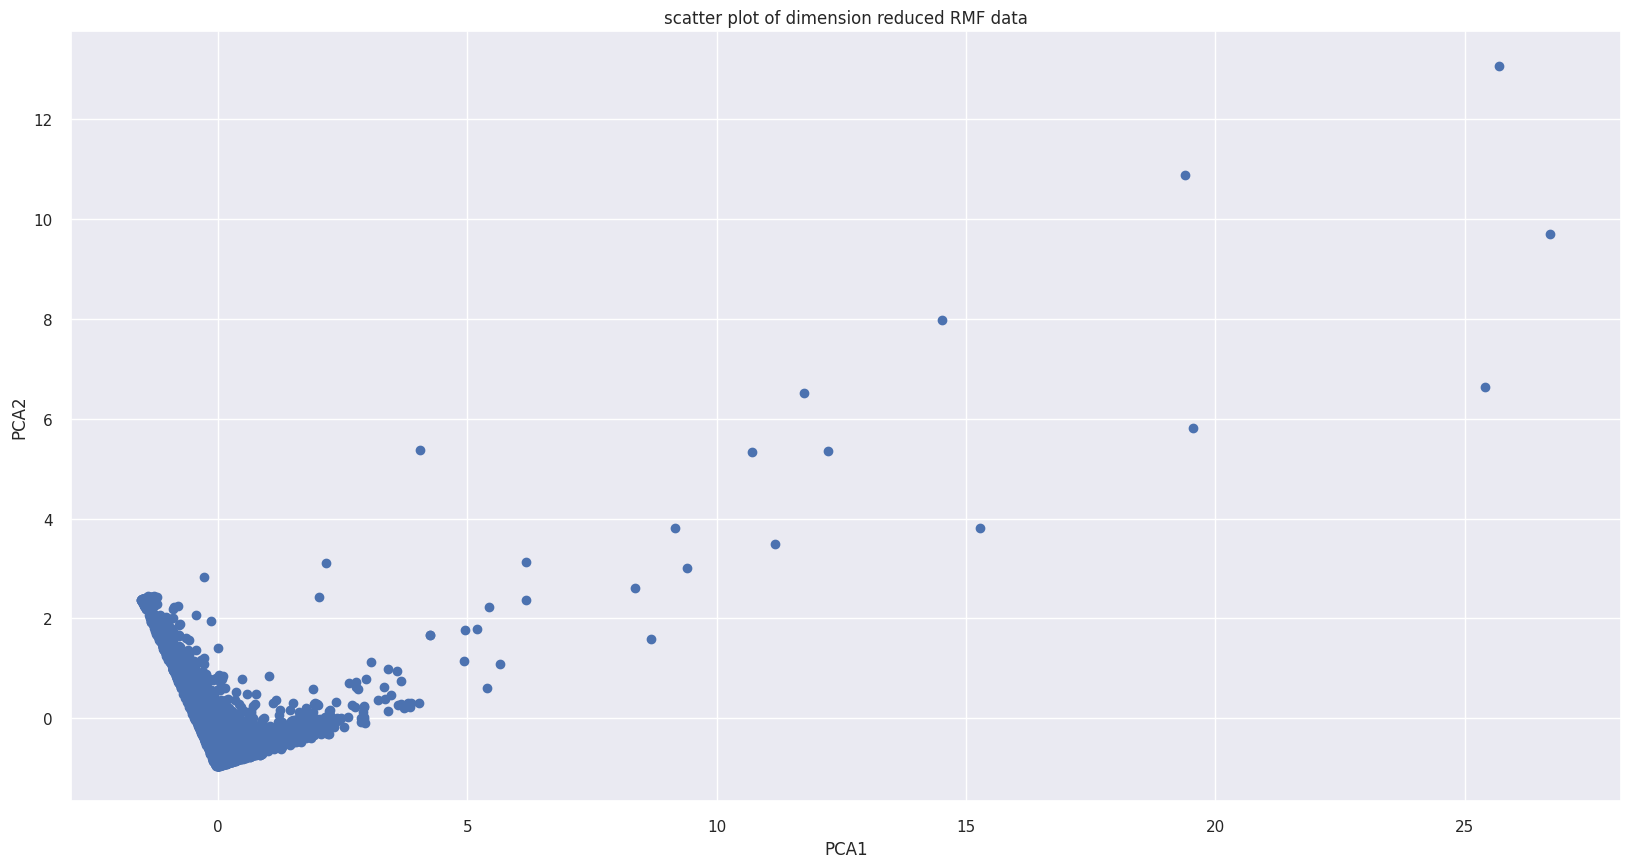

In [43]:
# Dividing the values into PCA1 and PCA2 to plot them in a scatter plot.

PCA1 = _2d_df[:,0]
PCA2 = _2d_df[:,1]
plt.scatter(x = PCA1, y = PCA2)
plt.title('scatter plot of dimension reduced RMF data')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

Even After reducing the dimensions of the RMF data we can not visually see the clusters because the data points are densly packed.

Our model might face difficults clustering the datapoints. In order to make our model better cluster the data we can apply log transformation of RFM datapoints.

If you look at the graph of a log, you will get to know that the lower the values the higher the reduction in the value would be. As the value increases the reduction in value(after applying log transformation) would be very low.

This very property of loG reduces the density among the datapoints.

Text(0, 0.5, 'log_PCA2')

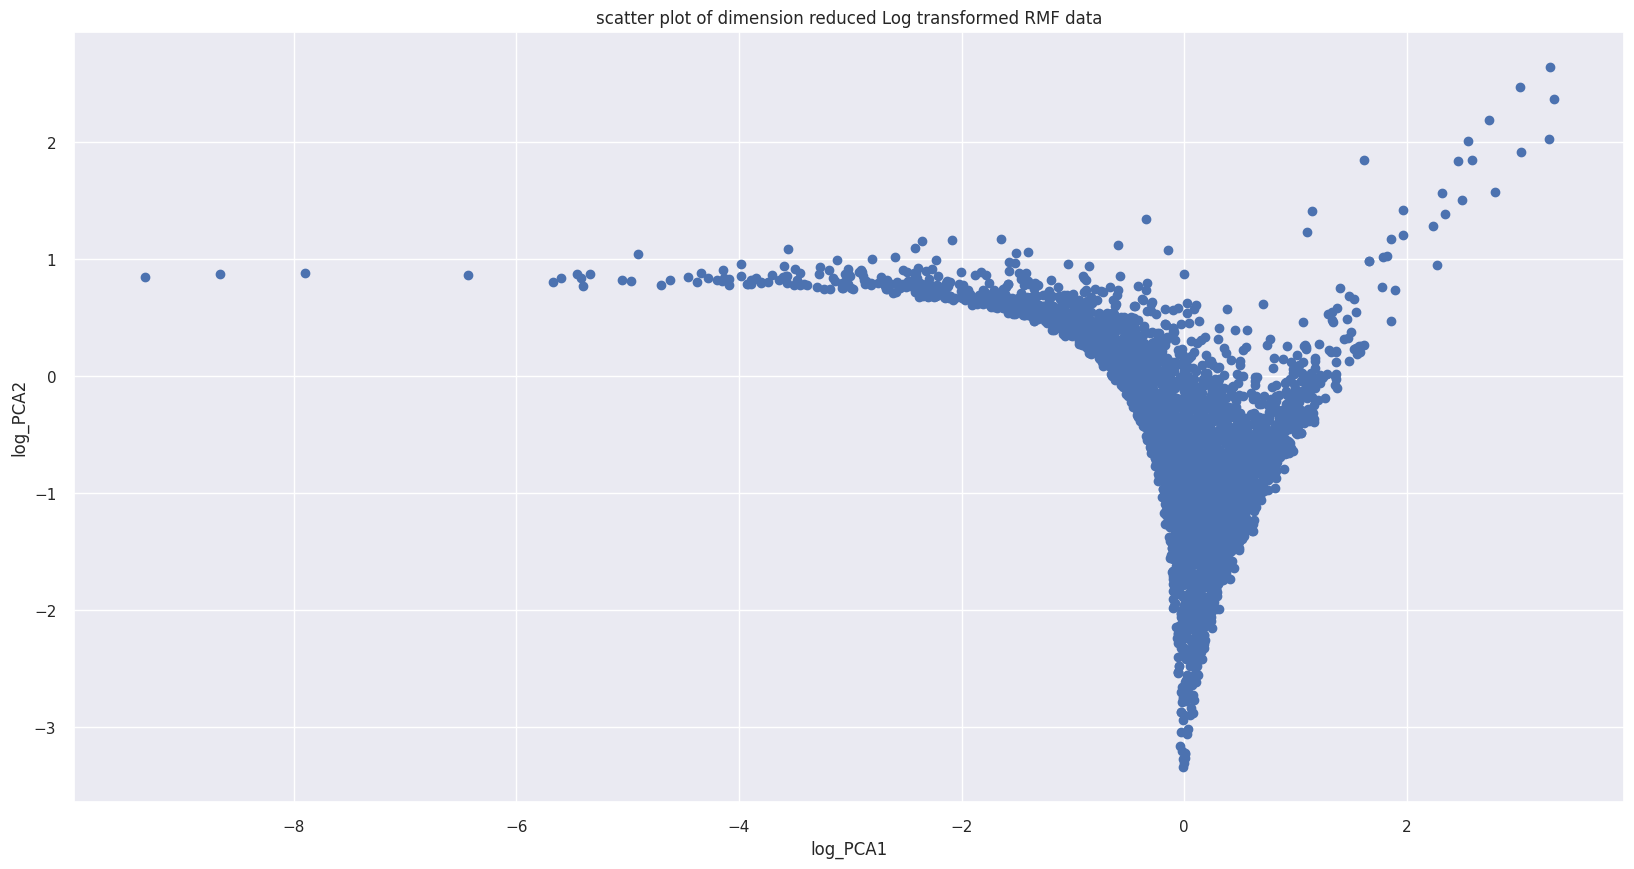

In [44]:
# Applying log transformation on PCA1 & PCA2.

log_PCA1 = np.log(PCA1 + 1)  # Adding 1 to all the datapoints because log of 0 is not defined.
log_PCA2 = np.log(PCA2 + 1)
plt.scatter(x = log_PCA1, y = log_PCA2)
plt.title('scatter plot of dimension reduced Log transformed RMF data')
plt.xlabel('log_PCA1')
plt.ylabel('log_PCA2')

As you can see after transformation we can visually hypothesize that there may be 3 clusters here. The datapoints are still densly packed though but, comparitively less densly packed.

## **K-means Clustering**

The *k*-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:

* The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
* Each point is closer to its own cluster center than to other cluster centers.

Those two assumptions are the basis of the *k*-means model.


Expectation–maximization (E–M) is a powerful algorithm that comes up in a variety of contexts within data science. *k*-means is a particularly simple and easy-to-understand application of the algorithm.

In short, the expectation–maximization approach here consists of the following procedure:

* Guess some cluster centers
* Repeat until converged
   * *E-Step*: assign points to the nearest cluster center
   * *M-Step*: set the cluster centers to the mean

Here the "E-step" or "Expectation step" is so-named because it involves updating our expectation of which cluster each point belongs to.

The "M-step" or "Maximization step" is so-named because it involves maximizing some fitness function that defines the location of the cluster centers — in this case, that maximization is accomplished by taking a simple mean of the data in each cluster.

In [45]:
# Applying log transformation on the data.

log_X_scale = np.log(X_scale + 1)

From above PCA plots we have seen that the datapoints are densly packed so I will be using the log_transformed data as input for K means clustering.

### **Identifying optimal clusters using K-Elbow method**

In [46]:
# Writting a for loop to calculate the inertia_ at various k values.

inertia_list = []
for k in range(2,8):
  kmeans_elbow = KMeans(n_clusters = k,random_state = 0)
  kmeans_elbow.fit(log_X_scale)
  inertia_list.append(kmeans_elbow.inertia_)

Text(0.5, 1.0, 'Inertia values at various clusters')

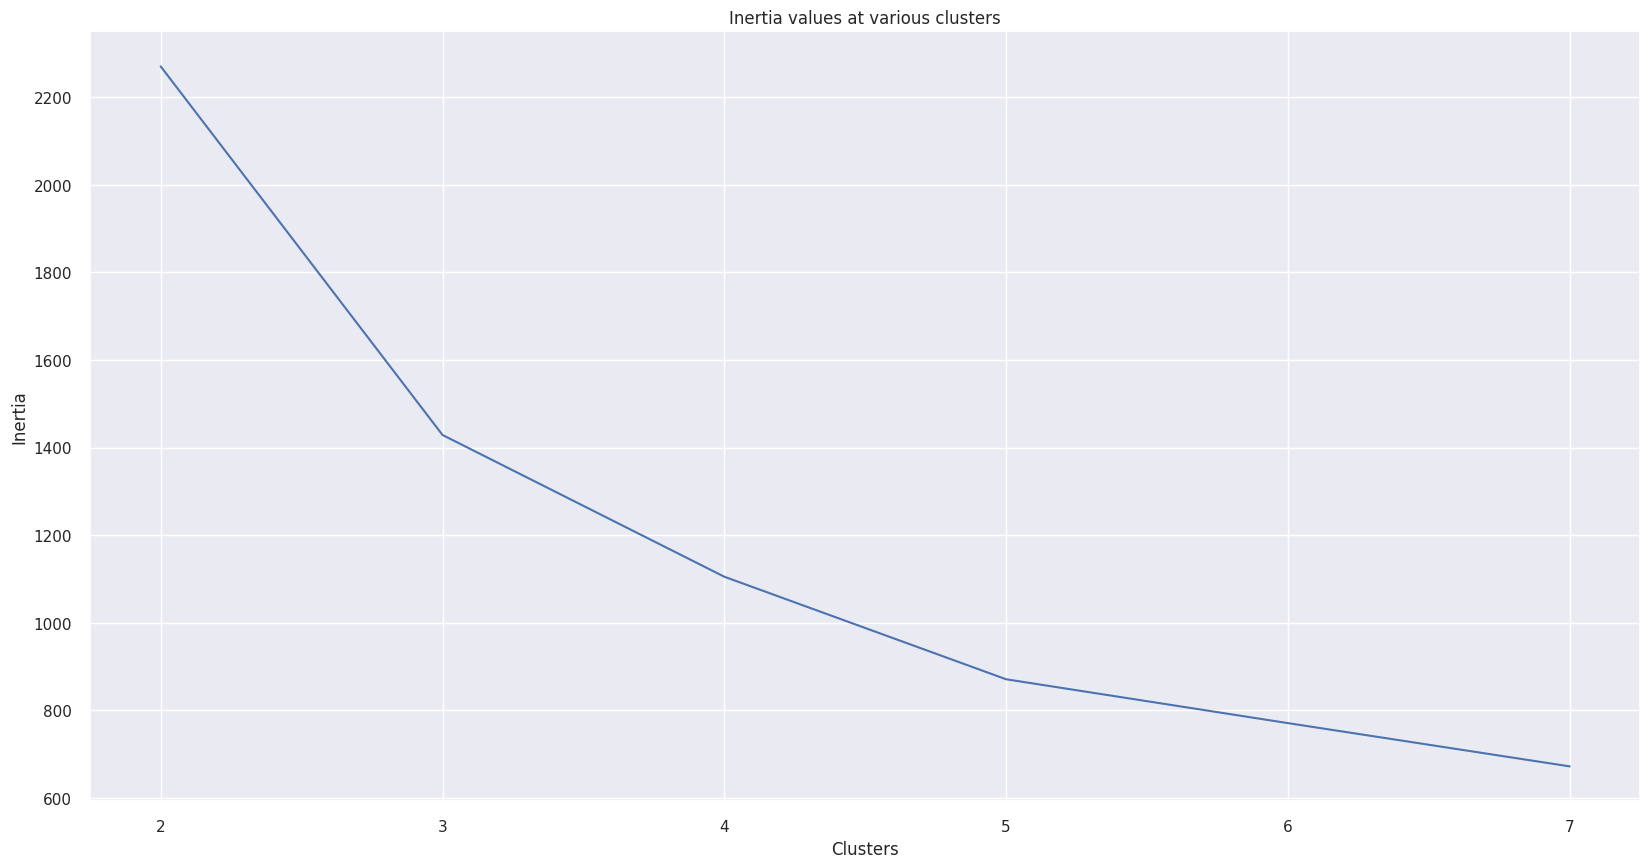

In [47]:
# Plotting the inertia values.

plt.plot(inertia_list)
x = [0,1,2,3,4,5]
label = [2,3,4,5,6,7]
plt.xticks(x,label)         # Used to change the X axis lables.
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.title('Inertia values at various clusters')

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 3.

**Inertia Meaning:** It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

### **Implementing the Kmeans clustering model when k = 3**

In [48]:
# Implementing K means clustering

model1 = KMeans(n_clusters = 3, random_state = 10)
model1.fit(log_X_scale)
label1 = model1.predict(log_X_scale)

In [49]:
# Checking out the cluster centers.

print('The cluster centers for this model are {}'.format(model1.cluster_centers_))

The cluster centers for this model are [[ 0.77824899 -0.32640504 -0.1804342 ]
 [-1.77712143  0.16359993  0.08042852]
 [-0.56055282 -0.18037566 -0.12117434]]


In [50]:
# Creating a dataframe for log_X_scale array & for label1 array

log_RMF_df = pd.DataFrame(log_X_scale, columns = ['log_Recency','log_Frequency','log_Monetary'])
model1_clusters_df = pd.DataFrame(label1, columns = ['Clusters'])

In [51]:
# Concating both the dataframe to plot a 3-D scatter plot & for customer segmentation.

model1_df = pd.concat([log_RMF_df,model1_clusters_df],axis = 1)
model1_df

,log_Recency,log_Frequency,log_Monetary,Clusters
0,1.202874,-0.505785,2.236870,0
1,-2.307083,0.340557,0.224566,1
2,-0.186837,-0.306422,-0.028336,2
3,-1.348778,-0.080844,-0.032892,1
4,1.156777,-0.394542,-0.211684,0
...,...,...,...,...
4334,1.047198,-0.441696,-0.233068,0
4335,0.631069,-0.462606,-0.247190,0
4336,-1.900104,-0.427995,-0.233427,1
4337,-2.211360,1.333971,-0.000299,1


In [52]:
# Visualizing a 3-D scatter plot of log transformed Model 1.

PLOT = go.Figure()

for C in list(model1_df.Clusters.unique()):

    PLOT.add_trace(go.Scatter3d(x = model1_df[model1_df.Clusters == C]['log_Recency'],
                                y = model1_df[model1_df.Clusters == C]['log_Frequency'],
                                z = model1_df[model1_df.Clusters == C]['log_Monetary'],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'Cluster ' + str(C)))


PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'log_Recency', titlefont_color = 'black'),
                                yaxis=dict(title = 'log_Frequency', titlefont_color = 'black'),
                                zaxis=dict(title = 'log_Monetary', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))


**Note:** I am only visualizing the log transformed Recency, Frequency, Monetary values because the clusters of the log transformed data can be easily inspected when compared to non log transformed Recency, Frequency, Monetary values because of the high density of the datapoints.

### **Interpretation of clusters for customer segmentation**

In [53]:
# Concatenating X and model1_df to assign clusters to Recency,Frequency,Monetary values.

model1_segmentation_df = pd.concat([X,model1_df],axis = 1)[['Recency','Frequency','Monetary','Clusters']]
model1_segmentation_df

,Recency,Frequency,Monetary,Clusters
0,325,1,77183.60,0
1,2,182,4310.00,1
2,75,31,1797.24,2
3,18,73,1757.55,1
4,310,17,334.40,0
...,...,...,...,...
4334,277,10,180.60,0
4335,180,7,80.82,0
4336,7,12,178.05,1
4337,3,721,2045.53,1


In [54]:
# Subsetting the data to understand the type of customers in each cluster.

model1_cluster0 = model1_segmentation_df[model1_segmentation_df['Clusters'] == 0][['Recency','Frequency','Monetary']]
model1_cluster1 = model1_segmentation_df[model1_segmentation_df['Clusters'] == 1][['Recency','Frequency','Monetary']]
model1_cluster2 = model1_segmentation_df[model1_segmentation_df['Clusters'] == 2][['Recency','Frequency','Monetary']]

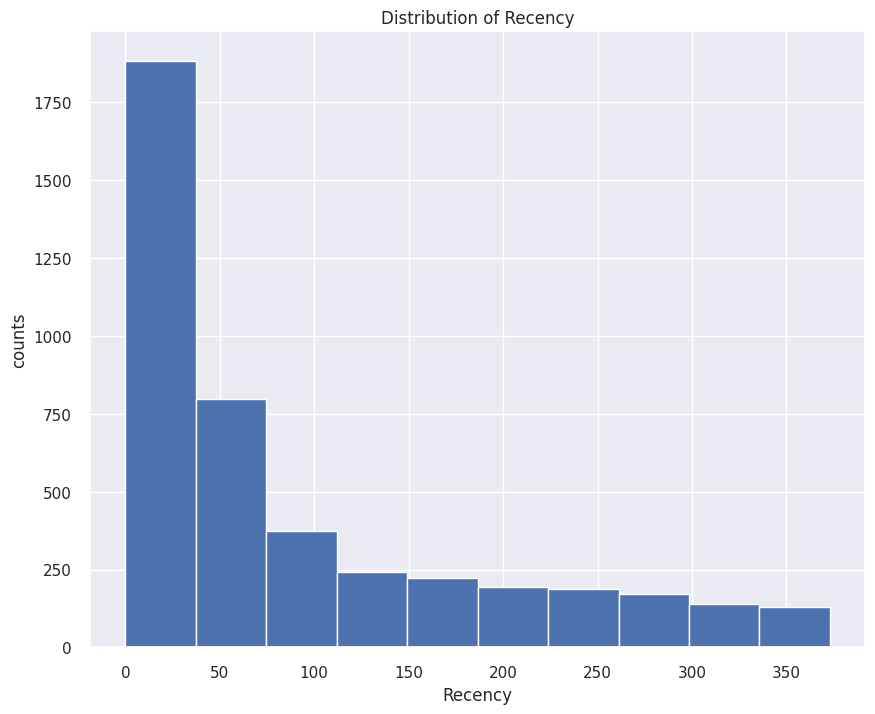

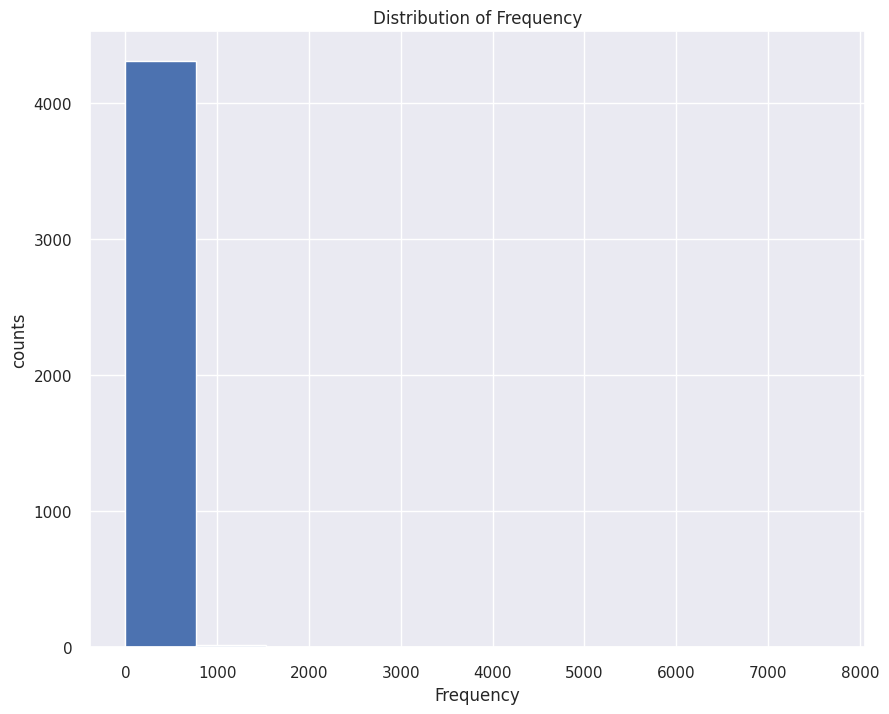

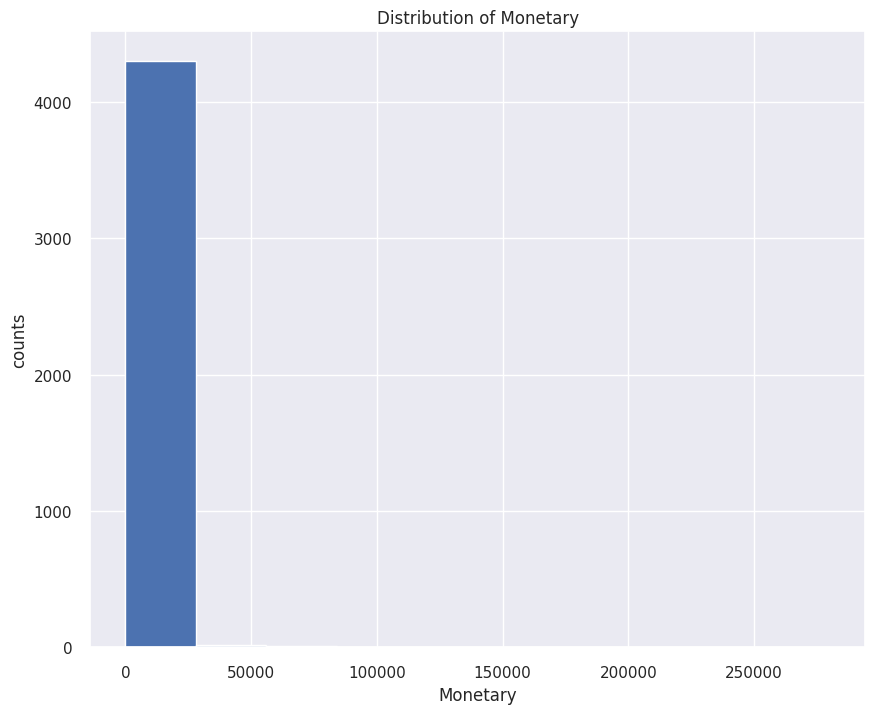

In [55]:
# Checking out the distributions to decide which measures of central tendency to be considered for defining clusters.

for col in ['Recency','Frequency','Monetary']:
  plt.figure(figsize = (10,8))
  plt.gca()
  plt.hist(model1_segmentation_df[col])
  plt.title('Distribution of {}'.format(col))
  plt.xlabel(col)
  plt.ylabel('counts')

The distributions of recency, frequency, monetary are all skewed this means there are a lot of outliers(anamolies) in the data. So I will be taking **median** to measure the central tendency of the data since mean is sensitve to outliers.

In [56]:
# Calculating the median values of Recency,Frequency,Monetary for each cluster and storing in a dataframe.

model1_cluster0_median_df = pd.DataFrame([[model1_cluster0['Recency'].median(),model1_cluster0['Frequency'].median(),model1_cluster0['Monetary'].median()]],
             columns = ['Recency_median','Frequency_median','Monetary_median'])


model1_cluster1_median_df = pd.DataFrame([[model1_cluster1['Recency'].median(),model1_cluster1['Frequency'].median(),model1_cluster1['Monetary'].median()]],
             columns = ['Recency_median','Frequency_median','Monetary_median'])


model1_cluster2_median_df = pd.DataFrame([[model1_cluster2['Recency'].median(),model1_cluster2['Frequency'].median(),model1_cluster2['Monetary'].median()]],
             columns = ['Recency_median','Frequency_median','Monetary_median'])


In [57]:
# Concatenating the 3 dataframes.

model1_median = pd.concat([model1_cluster0_median_df,model1_cluster1_median_df],axis = 0)
model1_median = pd.concat([model1_median,model1_cluster2_median_df],axis = 0).reset_index()
model1_median.drop(['index'],axis = 1, inplace = True)

In [58]:
model1_median

,Recency_median,Frequency_median,Monetary_median
0,215.0,19.0,330.95
1,9.0,103.5,1654.73
2,51.0,40.0,671.95


From the above DataFrame, we can classify the customers into 3 buckets.

* Important Customers = Cluster 1 customers can be considered as Important customers because the monetary median, frequency median values are high and recency median value is low.

* Modest customers = Cluster 2 customers can be considered as Modest customers because the monetary median, frequency median values are moderate and recency value is also not very high.

* Irrelavent customers = Cluster 1 customers can be considered as Irrelavent customers because the monetary median, frequency median values are low and recency value is high.

### **Identifying optimal clusters using Silhouette score**

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:

* Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a.
* Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.

The Silhouette Coefficient for a sample is $ S = \frac{(b - a)}{max(a, b)}$.

The Silhouette Coefficient value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

In [59]:
# Most optimal number of clusters using silhouette_score

silhouette_list = []
for k in range(2,8):
  Kmeans_silhouette = KMeans(n_clusters = k,random_state = 1)
  Kmeans_silhouette.fit(log_X_scale)
  label = Kmeans_silhouette.predict(log_X_scale)
  silhouette_list.append(silhouette_score(log_X_scale,label))

print('The silhouette_score for the clusters are as follows:',silhouette_list)

The silhouette_score for the clusters are as follows: [0.5210793671986009, 0.45900564406467015, 0.444955770251313, 0.42979071933836654, 0.43005311642911304, 0.3912912748269399]


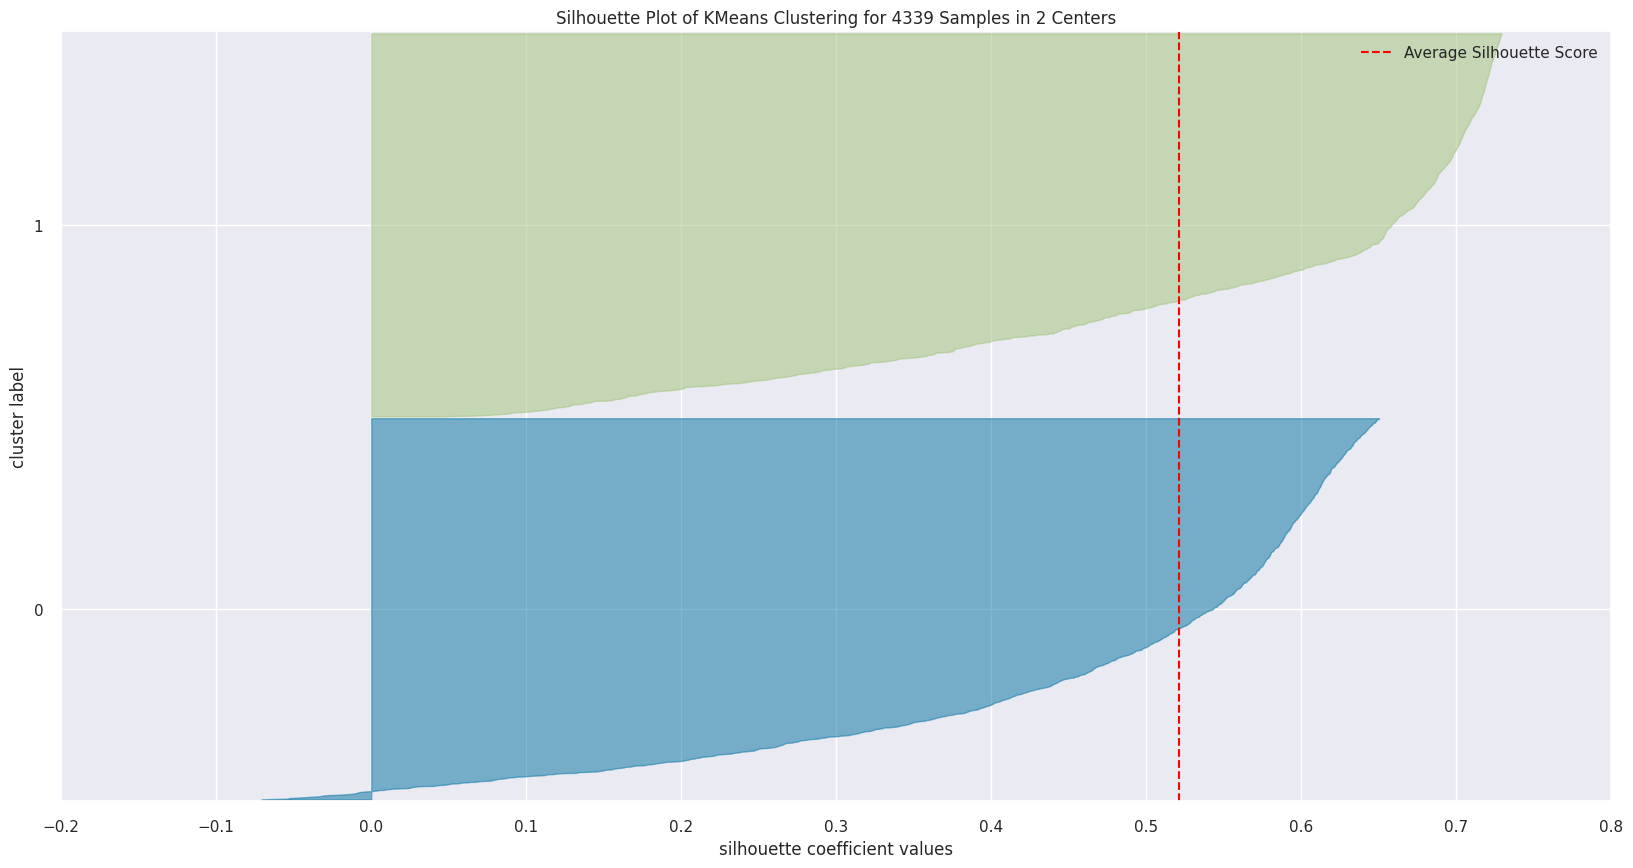

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 4339 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [60]:
# Visualizing the silhouette_score for k = 2(Largest Score) clusters.


kmeans_2 = KMeans(n_clusters = 2,random_state = 2)
visualizer = SilhouetteVisualizer(kmeans_2, colors='yellowbrick')
visualizer.fit(log_X_scale)
visualizer.show()

### **Implementing the Kmeans clustering model when k = 2**

In [61]:
# Implementing Kmeans Clusters(k = 2).

model2 = KMeans(n_clusters = 2, random_state = 20)
model2.fit(log_X_scale)
label2 = model2.predict(log_X_scale)

In [62]:
# Checking out the cluster centers.

print('The cluster centers for this model are {}'.format(model2.cluster_centers_))

The cluster centers for this model are [[ 0.37991527 -0.28661287 -0.16196811]
 [-1.44811038  0.05311704  0.01027391]]


In [63]:
# Creating a dataframe for log_X_scale array & for label2 array

log_RMF_df1 = pd.DataFrame(log_X_scale, columns = ['log_Recency','log_Frequency','log_Monetary'])
model2_clusters_df = pd.DataFrame(label2, columns = ['Clusters'])

In [64]:
# Concating both the dataframe to plot a 3-D scatter plot & for customer segmentation.

model2_df = pd.concat([log_RMF_df1,model2_clusters_df],axis = 1)
model2_df

,log_Recency,log_Frequency,log_Monetary,Clusters
0,1.202874,-0.505785,2.236870,0
1,-2.307083,0.340557,0.224566,1
2,-0.186837,-0.306422,-0.028336,0
3,-1.348778,-0.080844,-0.032892,1
4,1.156777,-0.394542,-0.211684,0
...,...,...,...,...
4334,1.047198,-0.441696,-0.233068,0
4335,0.631069,-0.462606,-0.247190,0
4336,-1.900104,-0.427995,-0.233427,1
4337,-2.211360,1.333971,-0.000299,1


In [65]:
# Visualising the scatter plot(3-D) of log transfomed model 2.

PLOT = go.Figure()

for C in list(model2_df.Clusters.unique()):

    PLOT.add_trace(go.Scatter3d(x = model2_df[model2_df.Clusters == C]['log_Recency'],
                                y = model2_df[model2_df.Clusters == C]['log_Frequency'],
                                z = model2_df[model2_df.Clusters == C]['log_Monetary'],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'Cluster ' + str(C)))


PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'log_Recency', titlefont_color = 'black'),
                                yaxis=dict(title = 'log_Frequency', titlefont_color = 'black'),
                                zaxis=dict(title = 'log_Monetary', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))


### **Interpretation of clusters for customer segmentation.**

In [66]:
# Concatenating X and model1_df to assign clusters to Recency,Frequency,Monetary values.

model2_segmentation_df = pd.concat([X,model2_df],axis = 1)[['Recency','Frequency','Monetary','Clusters']]
model2_segmentation_df

,Recency,Frequency,Monetary,Clusters
0,325,1,77183.60,0
1,2,182,4310.00,1
2,75,31,1797.24,0
3,18,73,1757.55,1
4,310,17,334.40,0
...,...,...,...,...
4334,277,10,180.60,0
4335,180,7,80.82,0
4336,7,12,178.05,1
4337,3,721,2045.53,1


In [67]:
# Subsetting the data to understand the type of customers in each cluster.

model2_cluster0 = model2_segmentation_df[model2_segmentation_df['Clusters'] == 0][['Recency','Frequency','Monetary']]
model2_cluster1 = model2_segmentation_df[model2_segmentation_df['Clusters'] == 1][['Recency','Frequency','Monetary']]
model2_cluster2 = model2_segmentation_df[model2_segmentation_df['Clusters'] == 2][['Recency','Frequency','Monetary']]

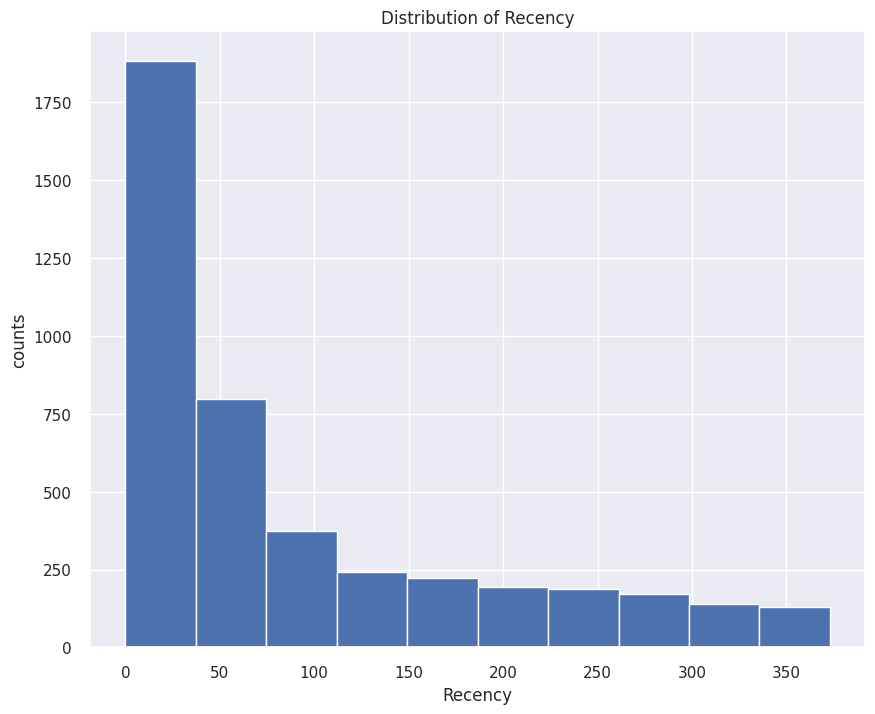

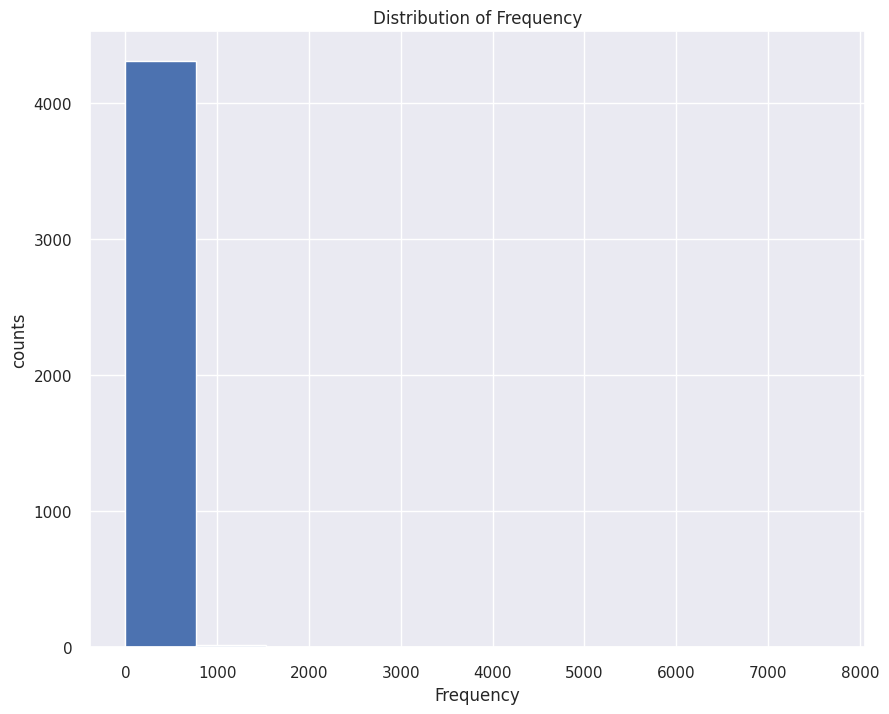

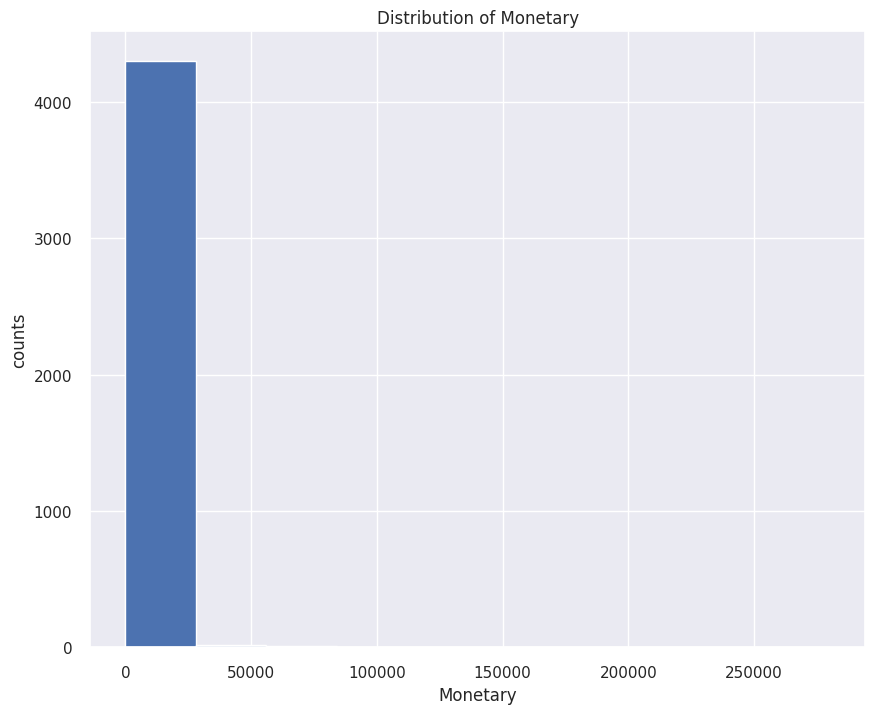

In [68]:
# Checking out the distributions to decide which measures of central tendency to be considered for defining the clusters.

for col in ['Recency','Frequency','Monetary']:
  plt.figure(figsize = (10,8))
  plt.gca()
  plt.hist(model2_segmentation_df[col])
  plt.title('Distribution of {}'.format(col))
  plt.xlabel(col)
  plt.ylabel('counts')

The distributions of recency, frequency, monetary are all skewed this means there are a lot of outliers(anamolies) in the data. So I will be taking **median** to measure the central tendency of the data since mean is sensitve to outliers.

In [69]:
# Calculating the median values of Recency,Frequency,Monetary for each cluster and storing in a dataframe.

model2_cluster0_median_df = pd.DataFrame([[model2_cluster0['Recency'].median(),model2_cluster0['Frequency'].median(),model2_cluster0['Monetary'].median()]],
             columns = ['Recency_median','Frequency_median','Monetary_median'])


model2_cluster1_median_df = pd.DataFrame([[model2_cluster1['Recency'].median(),model2_cluster1['Frequency'].median(),model2_cluster1['Monetary'].median()]],
             columns = ['Recency_median','Frequency_median','Monetary_median'])



In [70]:
# Concatenating the 3 dataframes.

model2_median = pd.concat([model2_cluster0_median_df,model2_cluster1_median_df],axis = 0).reset_index()
model2_median.drop('index',axis = 1, inplace = True)

In [71]:
model2_median

,Recency_median,Frequency_median,Monetary_median
0,141.0,24.0,412.395
1,17.0,78.0,1214.720


From the above DataFrame, we can classify the customers into 3 buckets.

* Important Customers = Cluster 1 customers can be considered as Important  customers because the monetary median, frequency median values are high and recency median value is low.

* Irrelavent customers = Cluster 0 customers can be considered as Irrelavent customers because the monetary median, frequency median values are low and recency value is high.

## **My hypothesis results**

In the segment 'Making Hypothesises from plots' I made a hypothesis that the clustering models will segment the data into 3 clusters. I was partially correct.

If we use the K-Elbow method for deciding the optimal number of clusers(k), it suggested me to segment the data into 3 cluster which was in favour of my hypothesis.

But if we use the silhouette_score for deciding the optimal number of clusters(k), it suggested me to segment the data into 2 cluster which was aganist my hypothesis.

## **Conclusion**

I have divided the conlusion into the below segments-

**Prerequisite stage:** We started the project by defining the problem. Then we performed various data preprocessing steps like dealing with duplicate, null values. We also performed feature engineering to create Total Price, Last Purchase Year, Month, Day, Hour columns. Then, we did some basic EDA by plotting Bars, Pie, Line plots etc..

**RFM & Making Hypothesis**: We then build a basic RFM model, made hypothesis on the number of clusters the model is going to return.

**K-means Clusters**: We implemented K-means Clustering model by using the K-Elbow and Silhouette_score. And then we went on to interpret the clusters given by the models(using K-Elow, Silhouette_score).

* K-Elbow Interpretation: This method suggested us to define K as 3. Based on the median values of recency, frequency, and monetary of each cluster we have identified the clusters as **Important Customers, Modest Customers, Irrelevant Customers**.

* Silhouette_score Interpretation: This method suggested us to define K as 2. Based on the median value of recency, frequency, and monetary of each cluster we have identified the clusters as **Important Customers, Irrelevant Customers**

If you ask me what value of K should be taken, I would advocate for K = 3 because it gives organinsation the opportunity to convert the modest customers into important customers unlike when K = 2.
